###### Link Datasets [click_here](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction)


###### About Datasets
This dataset provides comprehensive information for house price prediction, with 13 column names:

Price: The price of the house.

Area: The total area of the house in square feet.

Bedrooms: The number of bedrooms in the house.

Bathrooms: The number of bathrooms in the house.

Stories: The number of stories in the house.

Mainroad: Whether the house is connected to the main road (Yes/No).

Guestroom: Whether the house has a guest room (Yes/No).

Basement: Whether the house has a basement (Yes/No).

Hot water heating: Whether the house has a hot water heating system (Yes/No).

Airconditioning: Whether the house has an air conditioning system (Yes/No).

Parking: The number of parking spaces available within the house.

Prefarea: Whether the house is located in a preferred area (Yes/No).

Furnishing status: The furnishing status of the house (Fully Furnished,

Semi-Furnished, Unfurnished).

Kindly, upvote if you find the dataset interesting.

In [ ]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving archive.zip to archive (1).zip


{'archive (1).zip': b'PK\x03\x04-\x00\x00\x08\x08\x00L$\xe7V\xf8q\xf3\xd7\xff\xff\xff\xff\xff\xff\xff\xff\x0b\x00\x14\x00Housing.csv\x01\x00\x10\x00\x1du\x00\x00\x00\x00\x00\x00\xe4\x11\x00\x00\x00\x00\x00\x00\x9d\x9d\xebn,\xb7\r\x80\xff\x17\xe8\x9bl\x01\xdd\xa5y\x1c7q\x12\xa3\xc88\xf0qP\xf4\xed;#R\x1a]H\x8e\xe64\x8ew\x8f\x9b\xefP\xbc\x88\xa2(\xcd\xfa\xaf\xaf\x8f_\xde_o_\xefo\xaf\x7f\xbf\xff\xfa\xf5\xf9\xf9\xe7\x8f\xd7\xbf\xdf\xbe\xff\x80w?\xbe?\xbf>\xde\x7f\xbc\xfe|\xfb\xd8\xbf>\xdf~}\xfd\xfe\xf7\xfb\x8f\xef\xf3\xff;\xfe\xa3\x1f\xef\x7f\xbe\xef\xdf\xaf?>\xbf\xff\xfb\xf6\xfd\xfe\xf5\xc7\xfb\xdb\xf7\xc7\xfe\xfb\xeb\xed\xe3\xeb\x97\xcf\xfd\xd7\x8f\xef\x8f\xcf\xfd\xfc\xf3_o_\xff\xc9\xaf_\xef\xbfe9\xbf\xfd\xfd\xb5\x7f\xfc\xf8\xe3\xf8\xd9\x8f\xef\xb7\xef\xbf\x7f\xfc\xf3\x1f\xdaZu\xfe\xef\x15\x9dQ/\xf72/\xfb\xfa\xdf!v\xff\xc4\xaf\xf3\x0f&\x7fG\xf8\xfd\xd7\x832\xc6g*m\xe1\xa4\xce\x7f&\xca\x9eo(h;!{\xfc\xad\xa6@\x17\x0b?:\xf4\xfb\xf8W\x8fj\x9fGy|\xcf\xa3\x1cQ\x108\x0eS;\xdd*\xa7\x11+\xffV\xf5\

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
replace Housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### IMPORT MODULE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### DATA UNDERSTANDING

In [ ]:
data = pd.read_csv("/content/Housing.csv")
data

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [ ]:
data.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
data.groupby(["area"]).mean()

<ipython-input-108-2543d1dd0cfe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["area"]).mean()


price  bedrooms  bathrooms  stories  parking
area                                                    
1650    3150000.0       3.0        1.0      2.0      0.0
1700    1890000.0       3.0        1.0      2.0      0.0
1836    2275000.0       2.0        1.0      1.0      0.0
1905    4340000.0       5.0        1.0      2.0      0.0
1950    2835000.0       3.0        1.5      1.5      0.0
...           ...       ...        ...      ...      ...
12900   4900000.0       3.0        1.0      1.0      2.0
12944   3500000.0       3.0        1.0      1.0      0.0
13200   8365000.0       2.5        1.0      1.5      1.5
15600   5943000.0       3.0        1.0      1.0      2.0
16200  10150000.0       5.0        3.0      2.0      0.0

[284 rows x 5 columns]

In [ ]:
# Binning data

median = np.median(data["area"])
max = np.max(data["area"])
min = np.min(data["area"])
per_75 = np.percentile(data["area"], 75)
per_25 = np.percentile(data["area"], 25)

bins = [min, per_25, median, per_75, max]
labels = ["very_small", "small", "medium", "large"]
data["binned"] = pd.cut(data["area"], bins=bins, labels=labels)
data

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0                no             yes        2      yes        furnished   
1                no             yes        3       no        furnished   
2                no              no        2      yes   semi-furnished   
3                no             yes        3      yes        furnished   
4                no             yes        2       no        furnished   
..              ...             ...      ...      ...              ...   
540              no              no        2       no      unfurnished   
541              no              no        0       no   semi-furnished   
542              no              no        0       no      unfurnished   
543              no              no        0       no        furnished   
544              no              no        0       no      unfurnished   

         binned  
0         large  
1         large  
2         large  
3         large  
4         large  
..          ...  
540  very_small  
541  very_small  
542       small  
543  very_small  
544       small  

[545 rows x 14 columns]

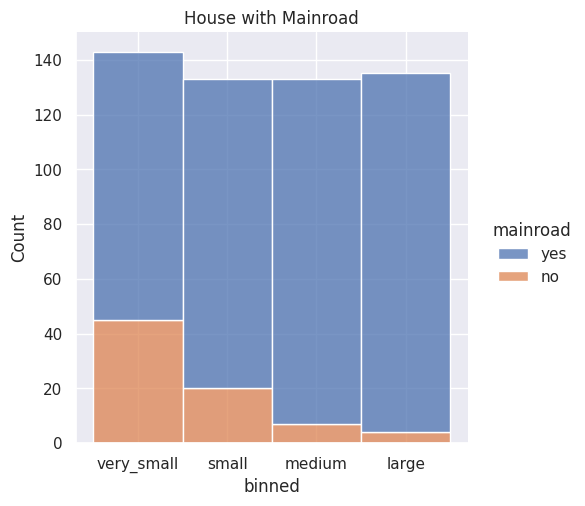

In [ ]:
sns.displot(data=data, x="binned", hue="mainroad", multiple="stack").set(title="House with Mainroad");

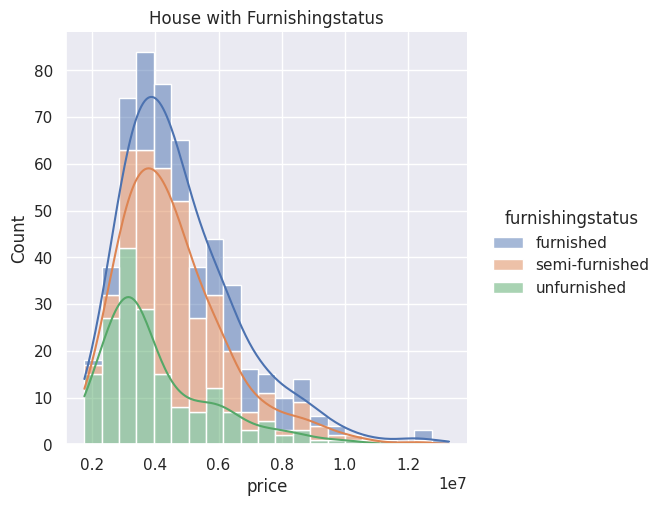

In [ ]:
sns.displot(data=data, x="price", hue="furnishingstatus", multiple="stack", kde=True).set(title="House with Furnishingstatus")

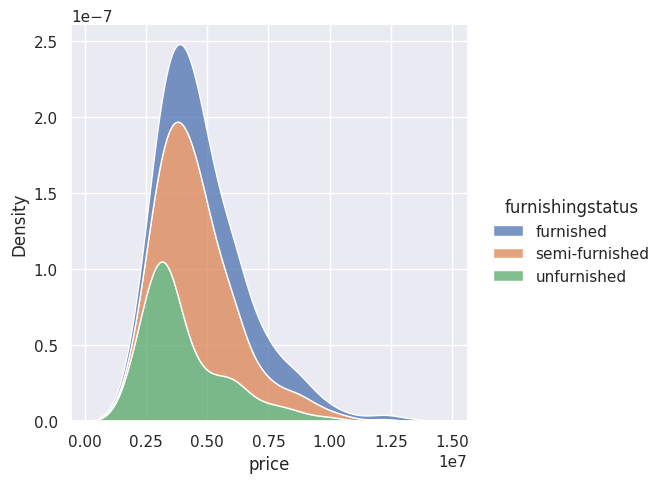

In [ ]:
sns.displot(data=data, x="price", hue="furnishingstatus", multiple="stack", kind="kde");

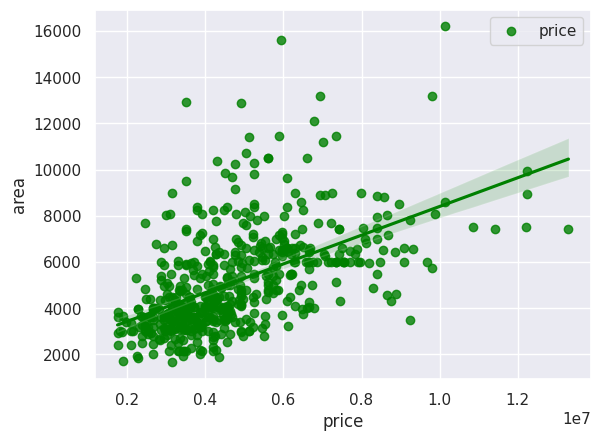

In [ ]:
x = sns.regplot(data, x="price", y="area", color="green", label="price")
x.legend(loc="best")

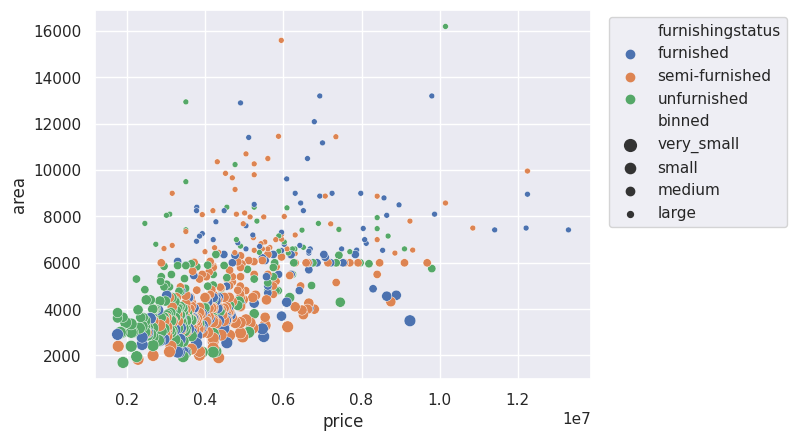

In [ ]:
x = sns.scatterplot(data=data, x="price", y="area", hue="furnishingstatus", size="binned");
x.legend(bbox_to_anchor=(1.02, 1))

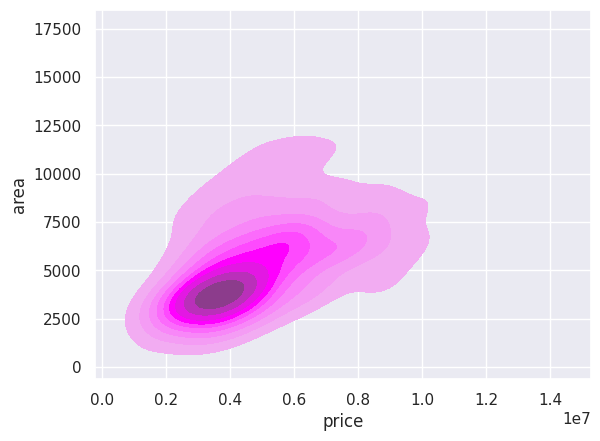

In [ ]:
sns.kdeplot(data=data, x="price", y="area", fill=True, color="purple");

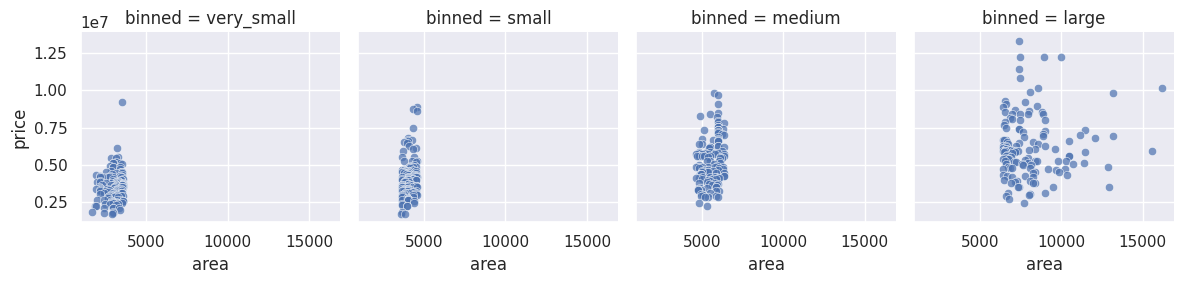

In [ ]:
g = sns.FacetGrid(data, col="binned")
g.map(sns.scatterplot, "area", "price", alpha=.7)

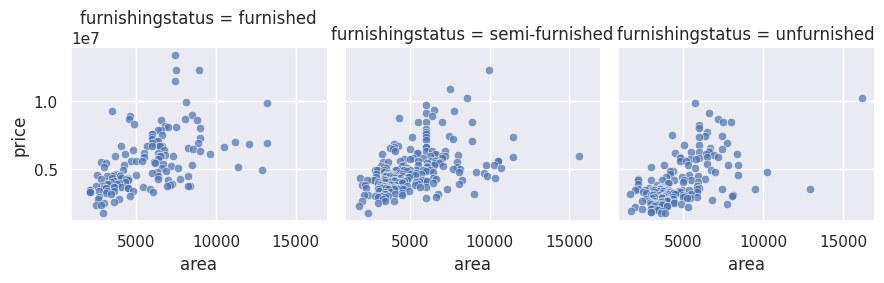

In [ ]:
g = sns.FacetGrid(data, col="furnishingstatus")
g.map(sns.scatterplot, "area", "price", alpha=.7)
plt.tight_layout()

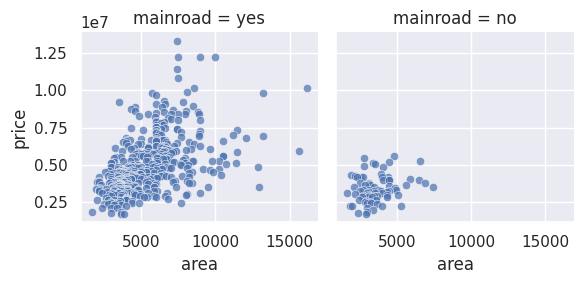

In [ ]:
g = sns.FacetGrid(data, col="mainroad")
g.map(sns.scatterplot, "area", "price", alpha=.7)
plt.tight_layout()

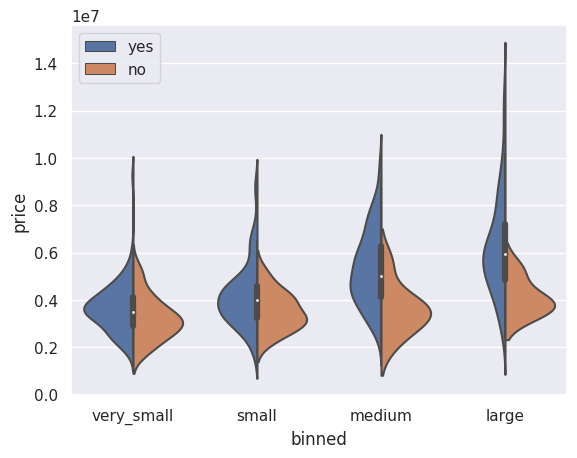

In [ ]:
x = sns.violinplot(data=data, x="binned", y="price", split=True, hue="mainroad");
x.legend(loc="upper left")

In [ ]:
# Delete outliers

def outliers(data):
  data_baru = pd.DataFrame(data)
  limit=3
  col=len(data_baru.columns)
  rows=len(data_baru.index)
  outliers=[]

  for i in range(0,col):
      subset=data_baru.iloc[:,i]
      mean_val=np.mean(subset)
      stan_dev=np.std(subset)
      for j in range(0,rows):
          z_score=(subset[j]-mean_val)/stan_dev
          if(np.abs(z_score)>limit):
              if j not in outliers:
                  outliers.append((j))

  hasil=pd.DataFrame(data_baru)
  hasil.drop(outliers, axis=0, inplace=True)
  return outliers

outliers = outliers(data["price"])
print("Outliers were deleted are",len(outliers))

Outliers were deleted are 6


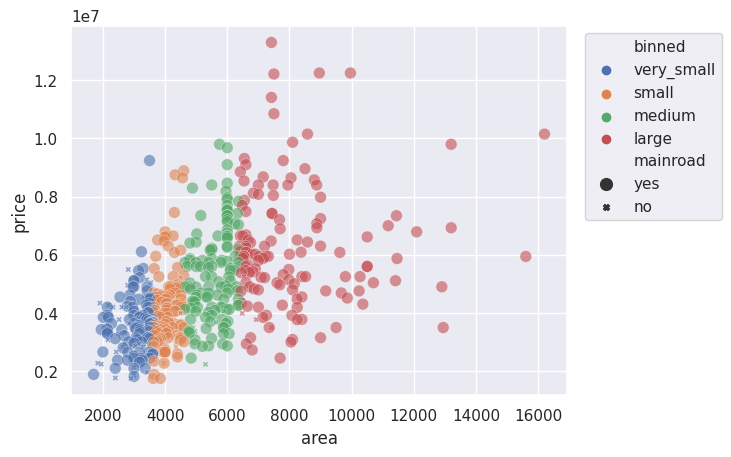

In [ ]:
x = sns.scatterplot(data, x="area", y="price", hue="binned", style="mainroad", size="mainroad", alpha=0.6)
x.legend(bbox_to_anchor=(1.02, 1))

<ipython-input-122-2de2f7db48a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["mainroad"]).sum().plot(kind="barh")


<Axes: ylabel='mainroad'>

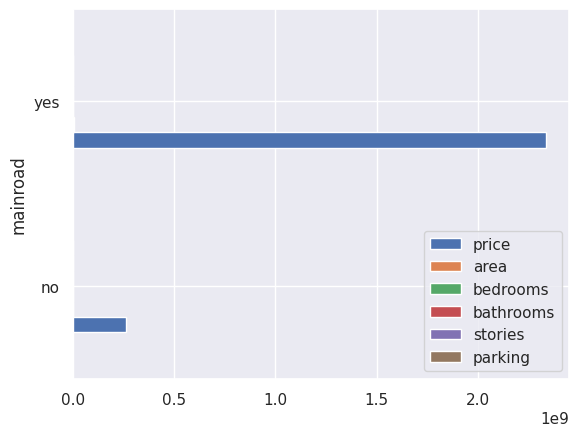

In [ ]:
data.groupby(["mainroad"]).sum().plot(kind="barh")

In [ ]:
data.groupby(["mainroad", "binned"]).mean()

<ipython-input-123-d02f87b845f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["mainroad", "binned"]).mean()


price         area  bedrooms  bathrooms   stories  \
mainroad binned                                                                 
no       very_small  3.240137e+06  2877.111111  2.955556   1.200000  1.511111   
         small       3.540775e+06  4131.300000  2.800000   1.300000  1.450000   
         medium      3.633000e+06  5225.142857  3.428571   1.285714  1.857143   
         large       4.128250e+06  6843.500000  3.500000   1.250000  1.750000   
yes      very_small  3.675932e+06  3069.520408  2.806122   1.163265  1.714286   
         small       4.202106e+06  4057.017699  2.787611   1.194690  1.637168   
         medium      5.381111e+06  5588.230159  3.079365   1.333333  2.142857   
         large       6.282843e+06  8137.221374  3.114504   1.442748  1.847328   

                      parking  
mainroad binned                
no       very_small  0.222222  
         small       0.350000  
         medium      0.142857  
         large       0.500000  
yes      very_small  0.479592  
         small       0.637168  
         medium      0.634921  
         large       1.213740

<ipython-input-124-177905eef079>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(["mainroad", "binned"]).mean().plot(kind="bar")


<Axes: xlabel='mainroad,binned'>

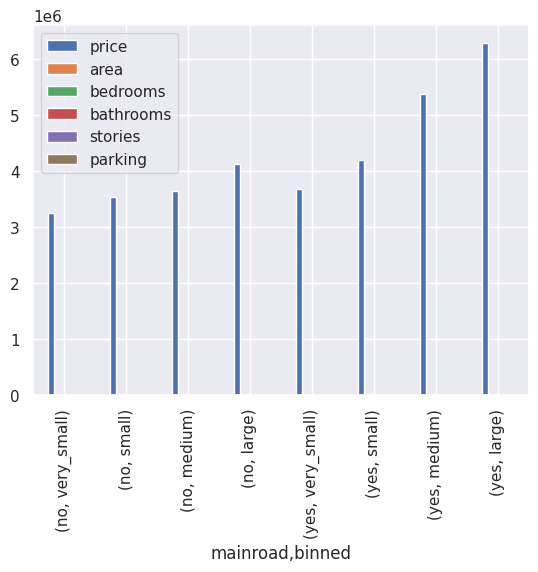

In [ ]:
data.groupby(["mainroad", "binned"]).mean().plot(kind="bar")

<Axes: ylabel='binned'>

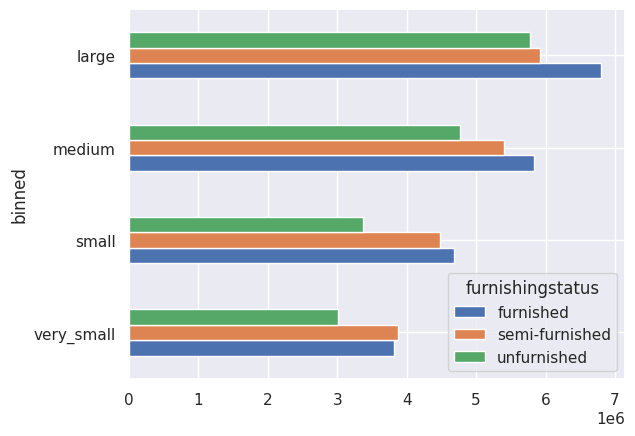

In [ ]:
pd.pivot_table(data, values="price", columns="furnishingstatus", index="binned", aggfunc="mean").plot(kind="barh")

<Axes: ylabel='Count'>

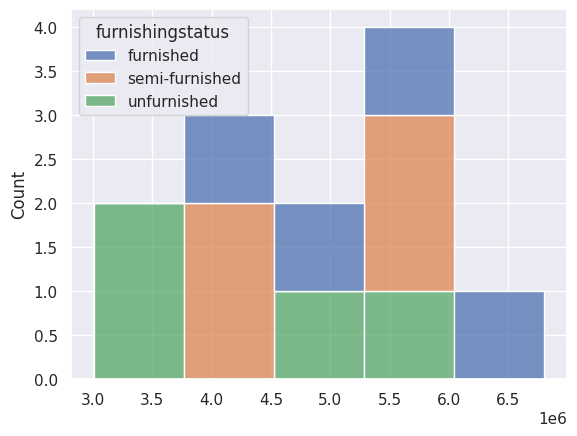

In [ ]:
z = pd.pivot_table(data, values="price", columns="furnishingstatus", index="binned", aggfunc="mean")
sns.histplot(z, multiple="stack")

In [ ]:
data

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0                no             yes        2      yes        furnished   
1                no             yes        3       no        furnished   
2                no              no        2      yes   semi-furnished   
3                no             yes        3      yes        furnished   
4                no             yes        2       no        furnished   
..              ...             ...      ...      ...              ...   
540              no              no        2       no      unfurnished   
541              no              no        0       no   semi-furnished   
542              no              no        0       no      unfurnished   
543              no              no        0       no        furnished   
544              no              no        0       no      unfurnished   

         binned  
0         large  
1         large  
2         large  
3         large  
4         large  
..          ...  
540  very_small  
541  very_small  
542       small  
543  very_small  
544       small  

[545 rows x 14 columns]

In [ ]:
# Convert Categorical data to Numeric for preprocessing data machine

mainroad = LabelEncoder()
mainroad = mainroad.fit_transform(data["mainroad"])

guestroom = LabelEncoder()
guestroom = guestroom.fit_transform(data["guestroom"])

basement = LabelEncoder()
basement = basement.fit_transform(data["basement"])

hotwaterheating = LabelEncoder()
hotwaterheating = hotwaterheating.fit_transform(data["hotwaterheating"])

airconditioning = LabelEncoder()
airconditioning = airconditioning.fit_transform(data["airconditioning"])

prefarea = LabelEncoder()
prefarea = prefarea.fit_transform(data["prefarea"])

furnishingstatus = LabelEncoder()
furnishingstatus = furnishingstatus.fit_transform(data["furnishingstatus"])

In [ ]:
# Concenate data

data_num = pd.DataFrame({
    "mainroad":mainroad,
    "guestroom":guestroom,
    "basement":basement,
    "hotwaterheating":hotwaterheating,
    "airconditioning":airconditioning,
    "prefarea":prefarea,
    "furnishingstatus":furnishingstatus,
})
data_num

mainroad  guestroom  basement  hotwaterheating  airconditioning  \
0           1          0         0                0                1   
1           1          0         0                0                1   
2           1          0         1                0                0   
3           1          0         1                0                1   
4           1          1         1                0                1   
..        ...        ...       ...              ...              ...   
540         1          0         1                0                0   
541         0          0         0                0                0   
542         1          0         0                0                0   
543         0          0         0                0                0   
544         1          0         0                0                0   

     prefarea  furnishingstatus  
0           1                 0  
1           0                 0  
2           1                 1  
3           1                 0  
4           0                 0  
..        ...               ...  
540         0                 2  
541         0                 1  
542         0                 2  
543         0                 0  
544         0                 2  

[545 rows x 7 columns]

In [ ]:
# Remove columns original category and replace with label encoders columns
data.drop(["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"], axis=1, inplace=True)
data = pd.concat([data, data_num], axis=1)
data

price  area  bedrooms  bathrooms  stories  parking      binned  \
0    13300000  7420         4          2        3        2       large   
1    12250000  8960         4          4        4        3       large   
2    12250000  9960         3          2        2        2       large   
3    12215000  7500         4          2        2        3       large   
4    11410000  7420         4          1        2        2       large   
..        ...   ...       ...        ...      ...      ...         ...   
540   1820000  3000         2          1        1        2  very_small   
541   1767150  2400         3          1        1        0  very_small   
542   1750000  3620         2          1        1        0       small   
543   1750000  2910         3          1        1        0  very_small   
544   1750000  3850         3          1        2        0       small   

     mainroad  guestroom  basement  hotwaterheating  airconditioning  \
0           1          0         0                0                1   
1           1          0         0                0                1   
2           1          0         1                0                0   
3           1          0         1                0                1   
4           1          1         1                0                1   
..        ...        ...       ...              ...              ...   
540         1          0         1                0                0   
541         0          0         0                0                0   
542         1          0         0                0                0   
543         0          0         0                0                0   
544         1          0         0                0                0   

     prefarea  furnishingstatus  
0           1                 0  
1           0                 0  
2           1                 1  
3           1                 0  
4           0                 0  
..        ...               ...  
540         0                 2  
541         0                 1  
542         0                 2  
543         0                 0  
544         0                 2  

[545 rows x 14 columns]

<ipython-input-131-9a2325b8f5e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".1f")


<Axes: >

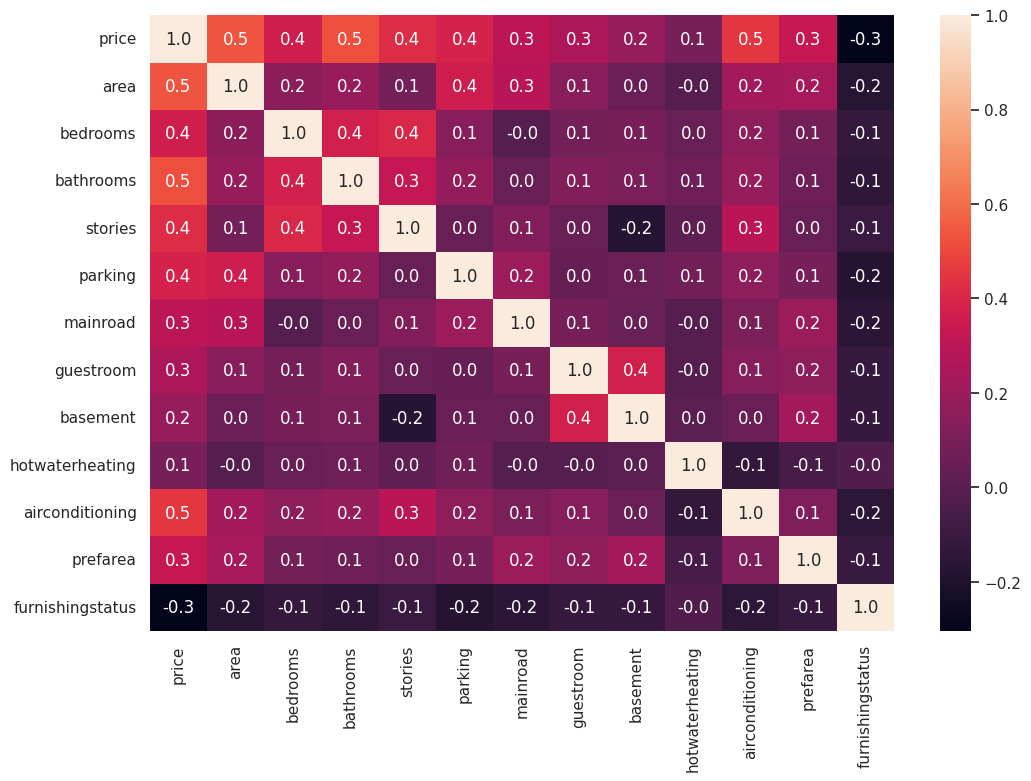

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".1f")

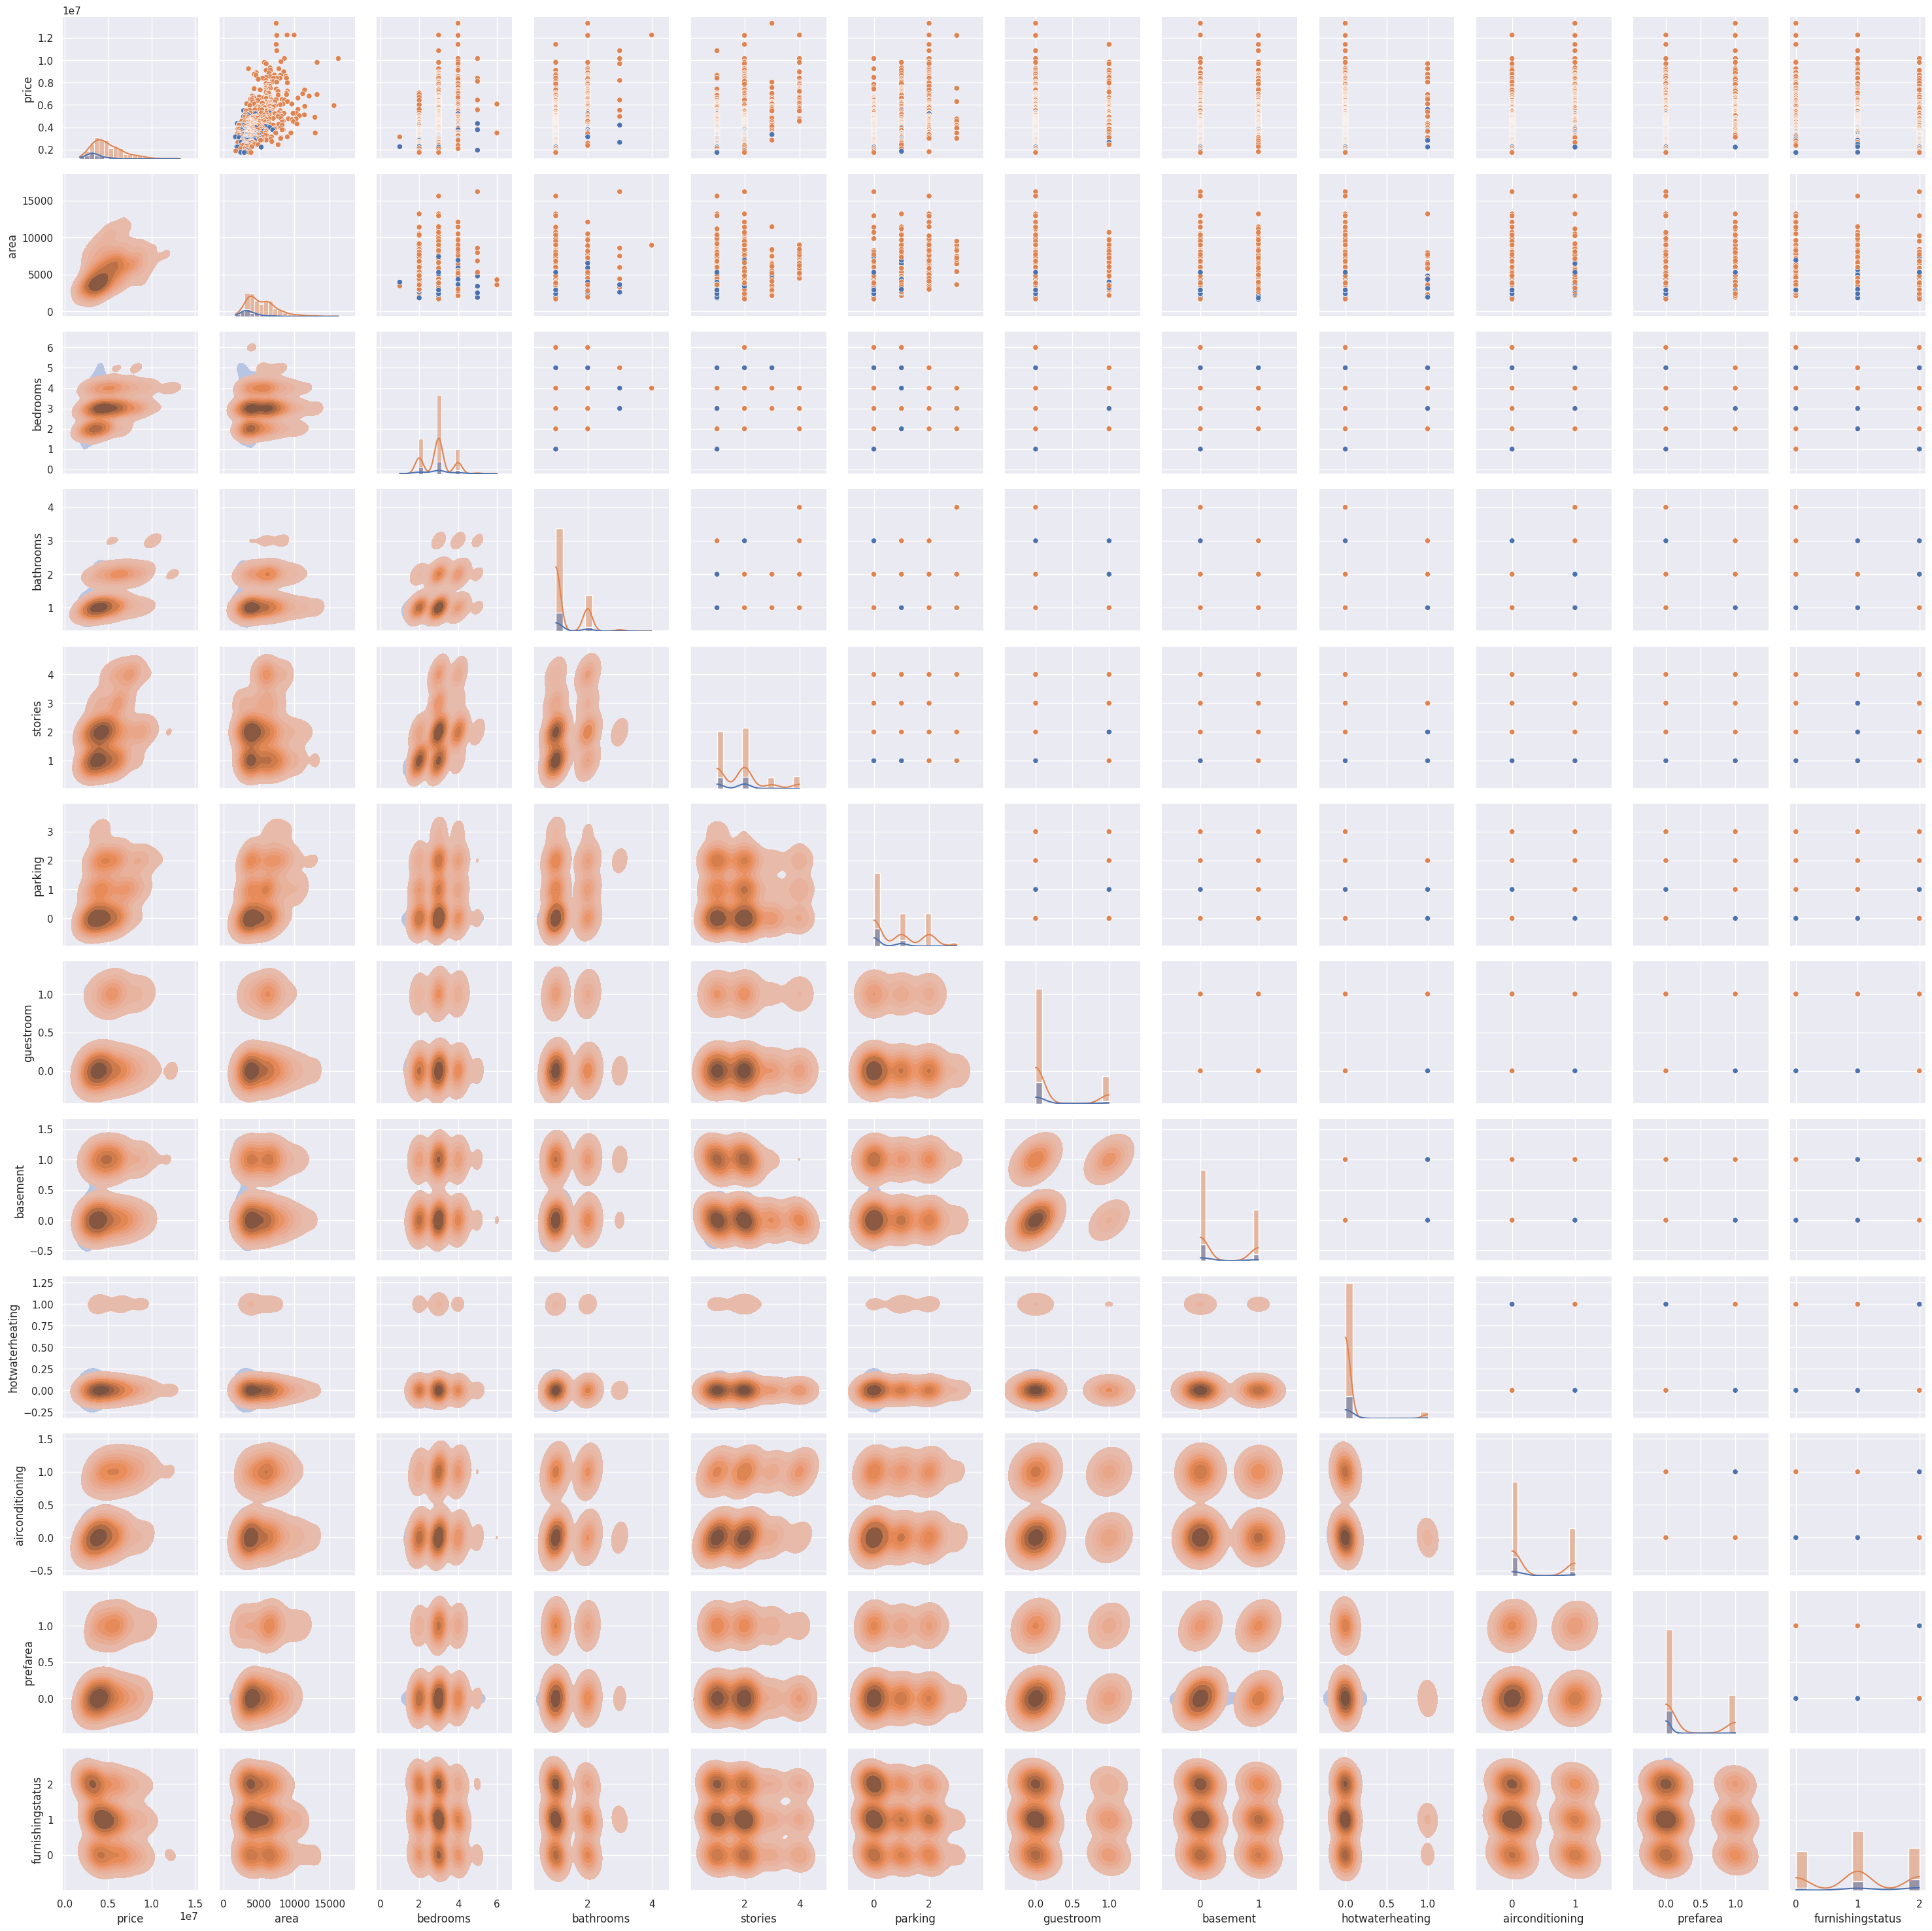

In [ ]:
g = sns.PairGrid(data, hue="mainroad")
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.kdeplot, fill=True)
# plt.savefig("b.jpg")

In [ ]:
# Delete outliers

data_baru = pd.DataFrame(data["price"])
limit=3
col=len(data_baru.columns)
rows=len(data_baru.index)
outliers=[]

for i in range(0,col):
    subset=data_baru.iloc[:,i]
    mean_val=np.mean(subset)
    stan_dev=np.std(subset)
    for j in range(0,rows):
        z_score=(subset[j]-mean_val)/stan_dev
        if(np.abs(z_score)>limit):
            if j not in outliers:
                outliers.append((j))

hasil=pd.DataFrame(data_baru)
hasil.drop(outliers, axis=0, inplace=True)
print("Outliers was removed is ",len(outliers))

Outliers was removed is  6


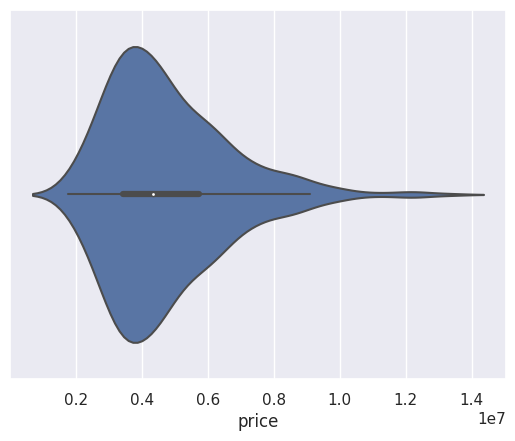

In [ ]:
sns.violinplot(x="price", data=data);

In [ ]:
X = data.iloc[:, 1]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train.shape, X_test.shape

((436,), (109,))

### MODELING

In [ ]:
# Normalized
X_train = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
y_train = (y_train - y_train.min(axis=0)) / (y_train.max(axis=0) - y_train.min(axis=0))
X_train

142    0.608247
159    0.103093
111    0.461993
494    0.353952
538    0.137388
         ...   
168    0.179381
326    0.168385
413    0.020619
239    0.161512
203    0.257732
Name: area, Length: 436, dtype: float64

In [ ]:
X_train = np.asarray(X_train).reshape(-1, 1)
y_train = np.asarray(y_train).reshape(-1, 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test = np.asarray(X_test).reshape(-1,1)
y_pred = model.predict(X_test)*1e+3
y_pred = np.ceil(y_pred)
y_pred[:5]

array([[3533393.],
       [3655230.],
       [2461226.],
       [2083531.],
       [4264416.]])

In [ ]:
y_test[:5]

206    4900000
59     7210000
74     6650000
221    4767000
31     8400000
Name: price, dtype: int64

### EVALUATION

In [ ]:
mse = mean_squared_error(y_test, y_pred) * 1e-11

print(f"MSE = {mse.round()}")

MSE = 49.0


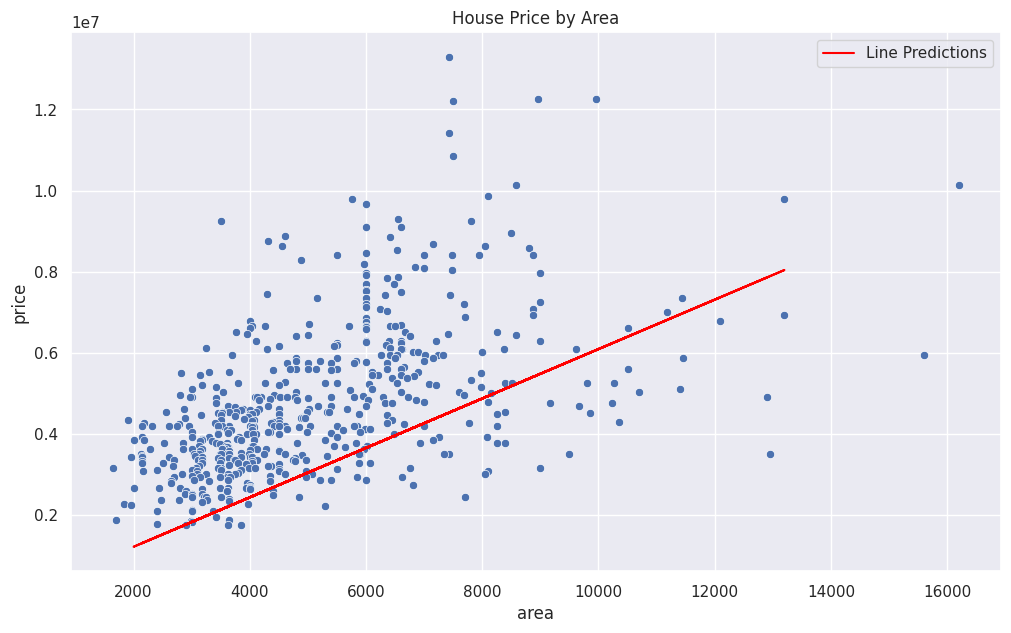

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x="area", y="price", data=data)
plt.plot(X_test, y_pred, markersize=6, color="red", label="Line Predictions")
plt.title("House Price by Area")
plt.legend()
plt.show()

In [ ]:
pd.DataFrame({
    "y_aktual" : np.asarray(y_test),
    "y_prediksi" : y_pred.flatten()
})

y_aktual  y_prediksi
0     4900000   3533393.0
1     7210000   3655230.0
2     6650000   2461226.0
3     4767000   2083531.0
4     8400000   4264416.0
..        ...         ...
104   5810000   3550450.0
105   4200000   2217552.0
106   2940000   2193184.0
107   4620000   3052136.0
108   7350000   3655230.0

[109 rows x 2 columns]

Summarize:

the final result of the model is not accurate, because the dataset is too small.